In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/bank_data.csv')

In [3]:
df.head(20)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male
5,731,548,520.710,Level 0 Recovery,35,Male
6,221,549,221.585,Level 0 Recovery,33,Male
7,1932,560,373.720,Level 0 Recovery,19,Female
8,1828,562,201.865,Level 0 Recovery,22,Female
9,2001,565,504.885,Level 0 Recovery,27,Male


In [4]:
df.shape

(1882, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [6]:
df.nunique()

id                          1882
expected_recovery_amount    1529
actual_recovery_amount      1882
recovery_strategy              5
age                           67
sex                            2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [7]:
df["recovery_strategy"].unique()

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

In [11]:
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


**Graphical Exploratory Data Analysis**

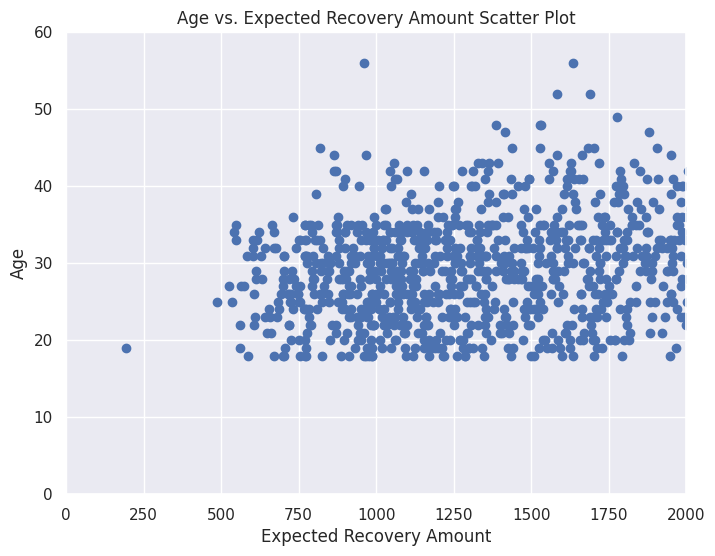

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(x = df['expected_recovery_amount'], y = df['age'])
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title("Age vs. Expected Recovery Amount Scatter Plot")

# Show the plot
plt.show()

we can't conclude a significant relationship between age and expected recovery amount so we will try a statistical method

**Statistical test: age vs. expected recovery amount**

The Kruskal-Wallis test is a non-parametric test used to determine whether there are statistically significant differences between the medians of three or more groups and doesn't assume normality.
Kruskal-Wallis test is used to compare the average age between two groups of the 'era_900_1100', specifically for the 'Level_0_Age' and 'Level_1_Age' recovery strategies.

In [14]:
from scipy import stats

# Compute average age just below and above the threshold
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]
by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_age = era_900_1100.loc[df['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[df['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age, Level_1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

Since the p-value (0.06298) is greater than the typical significance level (0.05), we fail to reject the null hypothesis. It indicates that there is not enough evidence to conclude that there are statistically significant differences in the average age between the 'Level_0_Age' and 'Level_1_Age' groups just above and just below the $1000 Expected Recovery Amount threshold.

so we concluded that  there is no major jump in the average customer age just above and just below the $1000 threshold by doing a statistical test as well as exploring it graphically with a scatter plot.

**Statistical test: sex vs. expected recovery amount**

Crosstab and Chi-square test are statistical tools commonly used to analyze the relationship between two categorical variables and determine whether there is a significant association between them.

crosstabulation helps visualize the relationship between categorical variables, while the Chi-square test quantifies the significance of that relationship. Together, they provide valuable insights into the associations and dependencies among categorical data.

In [15]:
# Number of customers in each category
# Compute the crosstab of sex and recovery_strategy
crosstab = pd.crosstab(df.loc[(df['expected_recovery_amount']<1100) &
                              (df['expected_recovery_amount']>=900)]['recovery_strategy'],df['sex'])
print(crosstab)

# Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print('p-val is: ', p_val)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55
p-val is:  0.5377947810444592



A p-value of 0.5378 indicates that there is no significant association between sex and the expected recovery amount being above or below 1000$ at the chosen significance level.

we fail to reject the null hypothesis. The null hypothesis in this context typically states that there is no difference between the percentage of male customers above and below the $1000 threshold for expected recovery amount.

**Exploratory graphical analysis: recovery amount**

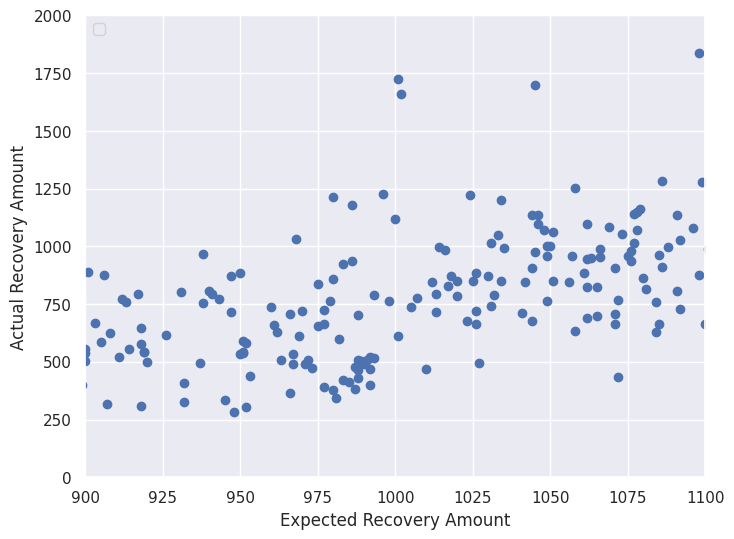

In [17]:
# Scatterplot: Actual Recovery Amount vs Expected Recovery Amount
plt.figure(figsize=(8, 6))
plt.scatter(x = df['expected_recovery_amount'], y = df['actual_recovery_amount'])
plt.xlim(900, 1100) #just below, just above threshold
plt.ylim(0, 2000)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend(loc = 2)
plt.show()

It is hard to determine the relationship between actual recovery amount and expected recovery amount from this scatter plot, so we will try statistical tests.  

**Statistical analysis: recovery amount**

Just as we did with age, we can perform statistical tests to see if the actual recovery amount has a discontinuity above the $1000 threshold. We are going to do this for two different windows of the expected recovery amount 900 to 1100 and for a narrow range of 950 to 1050 to see if our results are consistent.

In [21]:
# Compute average actual recovery amount just below and above the threshold
by_recovery_strategy['actual_recovery_amount'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_actual = era_900_1100.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_900_1100.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print("between 900 and 1100: ",stats.kruskal(Level_0_actual, Level_1_actual))

# Repeat for a smaller range of $950 to $1050
era_950_1050 = df.loc[(df['expected_recovery_amount']<1050) &
                      (df['expected_recovery_amount']>=950)]
Level_0_actual = era_950_1050.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_950_1050.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print("between 950 and 1050: ",stats.kruskal(Level_0_actual, Level_1_actual))

between 900 and 1100:  KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)
between 950 and 1050:  KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)


**Regression modeling: no threshold**

In [22]:
import statsmodels.api as sm

# Define X and y
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['expected_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the model summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     expected_recovery_amount   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                  1.000
Method:                       Least Squares   F-statistic:                 3.043e+29
Date:                      Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                              01:58:04   Log-Likelihood:                 4738.3
No. Observations:                       183   AIC:                            -9473.
Df Residuals:                           181   BIC:                            -9466.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.933e-12   1.83e-12      1.059      0.291   -1.67e-12    5.53e-12
expected_recovery_amount     1.0000   1.81e-15   5.52e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      102.974   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.519
Skew:                          -2.505   Prob(JB):                     1.69e-72
Kurtosis:                       7.273   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 **Regression modeling: adding true threshold**

In [23]:
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100[['expected_recovery_amount', 'indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):           1.83e-15
Time:                            01:59:07   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""